<a href="https://colab.research.google.com/github/Remonah-3/Chessboard_Problem/blob/main/Assignment_Chessboard_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

n_squares = 4
small_board_list = [1]


for i in range(n_squares - 1):
    last_number = small_board_list[-1]
    small_board_list.append(last_number * 2)
print(small_board_list)

small_board_array = np.array(small_board_list)
print(small_board_array)

board_2x2 = np.array([1, 2, 4, 8]).reshape(2, 2)
print(board_2x2)

[1, 2, 4, 8]
[1 2 4 8]
[[1 2]
 [4 8]]


In [22]:
def make_chessboard(rows, cols):
    total_squares = rows * cols
    numbers = []

    value = 1
    for i in range(total_squares):
        numbers.append(value)
        value = value * 2

    board = np.array(numbers).reshape(rows, cols)
    return board

board_8x8 = make_chessboard(8, 8)
print("8x8 board:\n", board_8x8)

total_wheat = board_8x8.sum()
print("Total grains on 8x8 board:", total_wheat)

column_means = board_8x8.mean(axis=0)
print("Average grains per column:", column_means)

8x8 board:
 [[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22

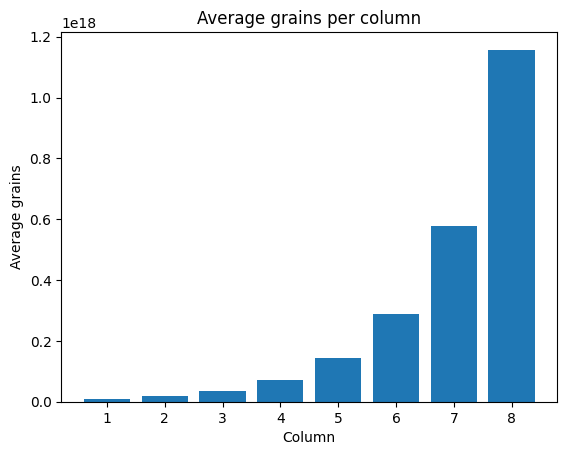

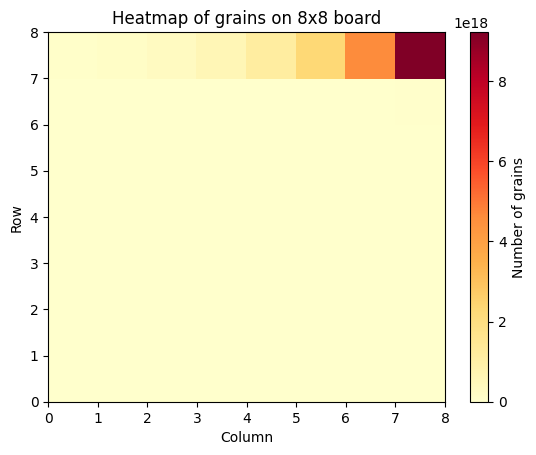

In [23]:
plt.bar(range(1, 9), column_means)
plt.xlabel("Column")
plt.ylabel("Average grains")
plt.title("Average grains per column")
plt.show()

plt.pcolor(board_8x8, cmap="YlOrRd")
plt.colorbar(label="Number of grains")
plt.xlabel("Column")
plt.ylabel("Row")
plt.title("Heatmap of grains on 8x8 board")
plt.show()

In [24]:
first_half = board_8x8[:4, :].sum()
second_half = board_8x8[4:, :].sum()

print("First half grains:", first_half)
print("Second half grains:", second_half)
print("Second half is", second_half / first_half, "times bigger.")

n_squares = 4
board_append = np.array([1])

for i in range(n_squares - 1):
    board_append = np.append(board_append, board_append[-1] * 2)

print(board_append)

First half grains: 4294967295.0
Second half grains: 1.8446744069414584e+19
Second half is 4294967296.0 times bigger.
[1 2 4 8]


In [25]:
n_squares = 4
numbers = np.arange(n_squares)
board_broadcast = 2 ** numbers
print(board_broadcast)

[1 2 4 8]


In [26]:
n_squares = 64
numbers_64 = np.arange(n_squares, dtype=np.uint64)
board_64 = 2 ** numbers_64
print(board_64[-1])

9223372036854775808


In [27]:
def make_chessboard_broadcast(rows, cols):
    total = rows * cols
    numbers = np.arange(total, dtype=np.uint64)
    board = (2 ** numbers).reshape(rows, cols)
    return board

board_8x8_b = make_chessboard_broadcast(8, 8)
print(board_8x8_b)

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

In [28]:
%%timeit

n_squares = 64
chessboard_list = [1]

for i in range(n_squares - 1):
    chessboard_list.append(chessboard_list[-1] * 2)

chessboard_array = np.array(chessboard_list)

27.6 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%%timeit

n_squares = 64
chessboard_np = np.array([1])

for i in range(n_squares - 1):
    chessboard_np = np.append(chessboard_np, chessboard_np[-1] * 2)

<magic-timeit>:5: RuntimeWarning: overflow encountered in scalar multiply


319 µs ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
%%timeit

n_squares = 64
chessboard_broadcast = 2 ** np.arange(n_squares)

2.64 µs ± 96.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
